In [ ]:
!pip install numpy==1.24.4 gensim==4.3.2 pandas==2.2.2 -qq
!pip install scipy==1.10.1

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Successfully uninstalled gensim-4.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.5.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.1 requires scipy>=1.11, but you have scipy 1.10.1 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.

In [ ]:
# 1. 필요한 라이브러리 불러오기
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

# 2. 데이터 준비
documents = [
    "Cats are cute.",
    "Dogs are loyal.",
    "Cats and dogs are friends.",
    "I like dogs and cats.",
    "I love dogs."
]

# 3. 텍스트 전처리
# 간단히 명사를 추출하거나 불용어를 제거할 수 있지만, 여기서는 공백으로 분리.
tokens = [doc.split() for doc in documents]  # 문장을 단어 리스트로 변환

# 4. LDA 모델 학습
# Gensim의 Dictionary와 Corpus 생성
dictionary = Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

# LDA 모델 생성
num_topics = 2 ## 토픽 2개의 경우
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics , random_state=0, passes=10)

# 5. 결과 출력
print("각 토픽의 주요 단어:")
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(f"토픽 {topic[0]}: {topic[1]}")

# 6. 문서별 토픽 분포 확인
print("\n문서별 토픽 분포:")
for i, row in enumerate(lda_model[corpus]):
    print(f"문서 {i+1}: {row}")

각 토픽의 주요 단어:
토픽 0: 0.128*"are" + 0.128*"dogs" + 0.128*"and"
토픽 1: 0.121*"I" + 0.120*"are" + 0.119*"love"

문서별 토픽 분포:
문서 1: [(0, 0.8564322), (1, 0.1435678)]
문서 2: [(0, 0.14850725), (1, 0.85149276)]
문서 3: [(0, 0.90863734), (1, 0.091362685)]
문서 4: [(0, 0.9008665), (1, 0.09913349)]
문서 5: [(0, 0.13613476), (1, 0.8638652)]


In [ ]:
# 패키지 불러오기

!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import pyLDAvis.gensim_models
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

sns.set()
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [ ]:
# GitHub의 raw URL 사용
url = 'https://raw.githubusercontent.com/vbomiv/topicmodeling/main/tm_text.csv'  # Remove extra ' at the end
data = pd.read_csv(url, encoding='utf8')
data

,date,text
0,1915.01.01,"To start this diary rightly, it should begin o..."
1,1915.01.02,This is the kind of day which if it were possi...
2,1915.01.03,"It is strange how old traditions, so long buri..."
3,1915.01.04,I do not like the Jewish voice; I do not like ...
4,1915.01.05,"I had a letter this morning from Nessa, who ca..."
...,...,...
1609,1941.02.07,Why was I depressed? I cannot remember.\r\n\r\...
1610,1941.02.16,In the wild grey water after last weeks turmoi...
1611,1941.02.26,My ‘higher life’ is almost entirely the Elizab...
1612,1941.03.08,Just back from L.’s speech at Brighton. Like a...


In [ ]:
# spaCy 모델:
nlp = en_core_web_md.load()

# 글에서 제거하고 싶은 품사태그 입력 (부사(ADV), 대명사(PRON), 접속사(CCONJ), 구두점(PUNCT), 입자(PART), 한정사(DET), 전치사/후치사(ADP), 공백(SPACE), 수사(NUM), 기호(SYM), 동사(VERB), 형용사(ADJ))
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM', 'VERB', 'ADJ']

# 불용어 사용자 설정
custom_stop_words = ['nan', 'nat', 'shall', 'oh', 'mrs', 'mr', 'ms', 's', 'yes', 'shd', 'cd', 'wh', 'wd'] # 사용자가 임의로 지정한 불용어 추가하기
tokens = []

# 'text'열을 스트링으로 전환하여 잠재적으로 누락될 수 있는 값 처리
for text in nlp.pipe(data['text'].astype(str).fillna('')):
   proj_tok = [token.lemma_.lower() for token in text
               if token.pos_ not in removal and
               not token.is_stop and
               token.is_alpha and
               token.lemma_.lower() not in custom_stop_words]
   tokens.append(proj_tok)

In [ ]:
data['tokens'] = tokens
data['tokens']

,tokens
0,"[diary, day, year, breakfast, letter, hallett,..."
1,"[kind, day, sample, life, le, grys, appetite, ..."
2,"[tradition, think, hyde, park, gate, sunday, m..."
3,"[voice, laugh, saxon, phrase, flora, woolf, ty..."
4,"[letter, morning, nessa, waterlow, hausfrau, p..."
...,...
1609,"[charlie, chaplin, milk, girl, glow, thrale, c..."
1610,"[water, week, turmoil, dinner, dadie, confiden..."
1611,"[life, elizabethan, play, finished, pointz, ha..."
1612,"[speech, brighton, town, spring, day, woman, s..."


In [ ]:
# 딕셔너리로 각 단어마다 고유 아이디 부여
dictionary = Dictionary(data['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


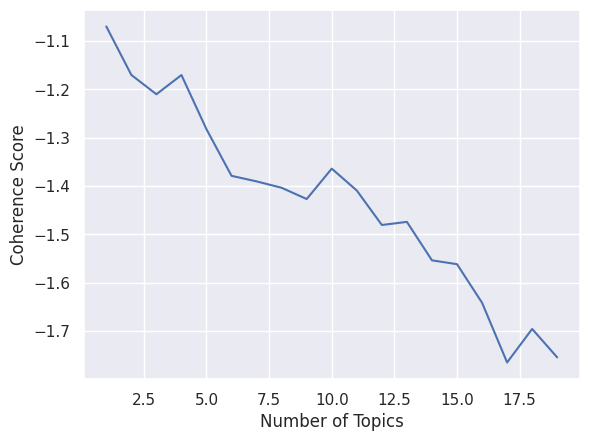

In [ ]:
#C_umass를 이용해서 일관성 점수 구하기
topics = []
score = []
for i in range(1, 20):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=15, random_state=0)
   coh_model = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(coh_model.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


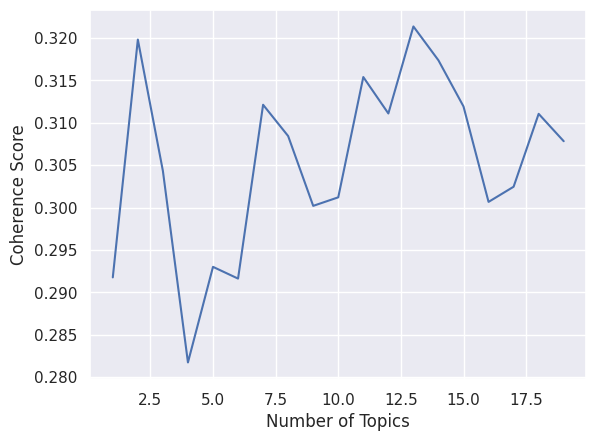

In [ ]:
#c_v를 사용해서 일관성 점수 구하기
topics = []
score = []
for i in range(1, 20):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=15, random_state=0)
   coh_model = CoherenceModel(model=lda_model, texts = data['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(coh_model.get_coherence())

plt.plot(topics, score)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

In [ ]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, random_state=0, passes=15)
lda_model.print_topics(-1)


[(0,
  '0.023*"clive" + 0.018*"man" + 0.018*"nessa" + 0.018*"night" + 0.013*"life" + 0.012*"woman" + 0.010*"year" + 0.010*"time" + 0.009*"maynard" + 0.008*"room"'),
 (1,
  '0.025*"week" + 0.017*"yesterday" + 0.015*"morning" + 0.015*"letter" + 0.013*"lytton" + 0.013*"today" + 0.013*"night" + 0.012*"tea" + 0.011*"people" + 0.011*"time"'),
 (2,
  '0.020*"life" + 0.017*"thing" + 0.017*"way" + 0.014*"time" + 0.013*"year" + 0.013*"morning" + 0.012*"mind" + 0.012*"feeling" + 0.011*"people" + 0.011*"letter"'),
 (3,
  '0.018*"people" + 0.013*"man" + 0.012*"time" + 0.012*"story" + 0.012*"desmond" + 0.011*"tea" + 0.010*"thing" + 0.009*"murry" + 0.009*"eye" + 0.008*"letter"'),
 (4,
  '0.017*"morning" + 0.013*"time" + 0.013*"week" + 0.011*"way" + 0.011*"yesterday" + 0.010*"room" + 0.010*"letter" + 0.010*"today" + 0.010*"house" + 0.010*"thing"'),
 (5,
  '0.016*"man" + 0.015*"night" + 0.015*"london" + 0.014*"house" + 0.011*"street" + 0.011*"people" + 0.010*"roger" + 0.009*"nessa" + 0.009*"clive" + 0.

In [ ]:
#시각화 생성
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

# 시각화 저장
pyLDAvis.save_html(lda_display, 'index.html')

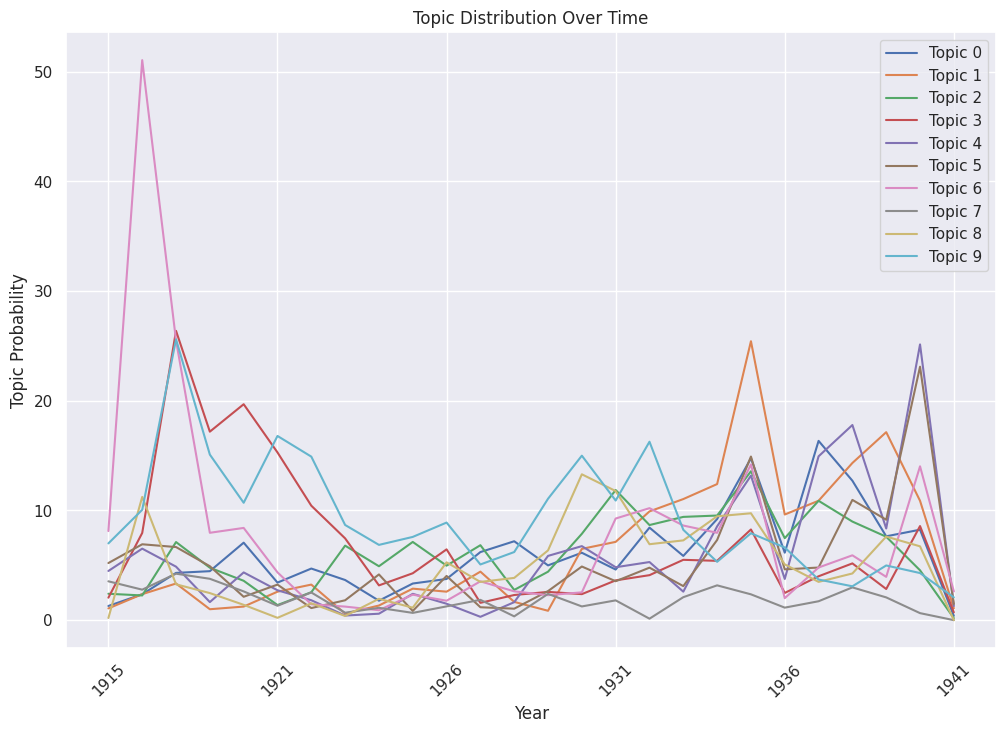

In [ ]:
import matplotlib.pyplot as plt

# data 행에서 년도만 추출
data['year'] = data['date'].apply(lambda x: x.split('.')[0])

# 각 문서별 토픽 분포 계산
topic_dist = lda_model[corpus]

# 각 년도별로 토픽 분포를 저장하는 딕셔너리 생성
topic_dist_per_year = {}
for i, doc in enumerate(topic_dist):
    year = data['year'][i]  # Use the extracted year
    if year not in topic_dist_per_year:
        topic_dist_per_year[year] = {}
    for topic_id, prob in doc:
        if topic_id not in topic_dist_per_year[year]:
            topic_dist_per_year[year][topic_id] = 0
        topic_dist_per_year[year][topic_id] += prob

# 그래프 위한 데이터 준비
years = sorted(topic_dist_per_year.keys())
topic_probs = {topic_id: [topic_dist_per_year[year].get(topic_id, 0) for year in years] for topic_id in range(lda_model.num_topics)}

# Plot the topic distributions over time그래프 위한 데이터 준비
plt.figure(figsize=(12, 8))
for topic_id, probs in topic_probs.items():
    plt.plot(years, probs, label=f'Topic {topic_id}')

plt.xticks(ticks=range(0, len(years), 5), labels=[years[i] for i in range(0, len(years), 5)], rotation=45)
plt.xlabel('Year')
plt.ylabel('Topic Probability')
plt.title('Topic Distribution Over Time')
plt.legend()
plt.show()

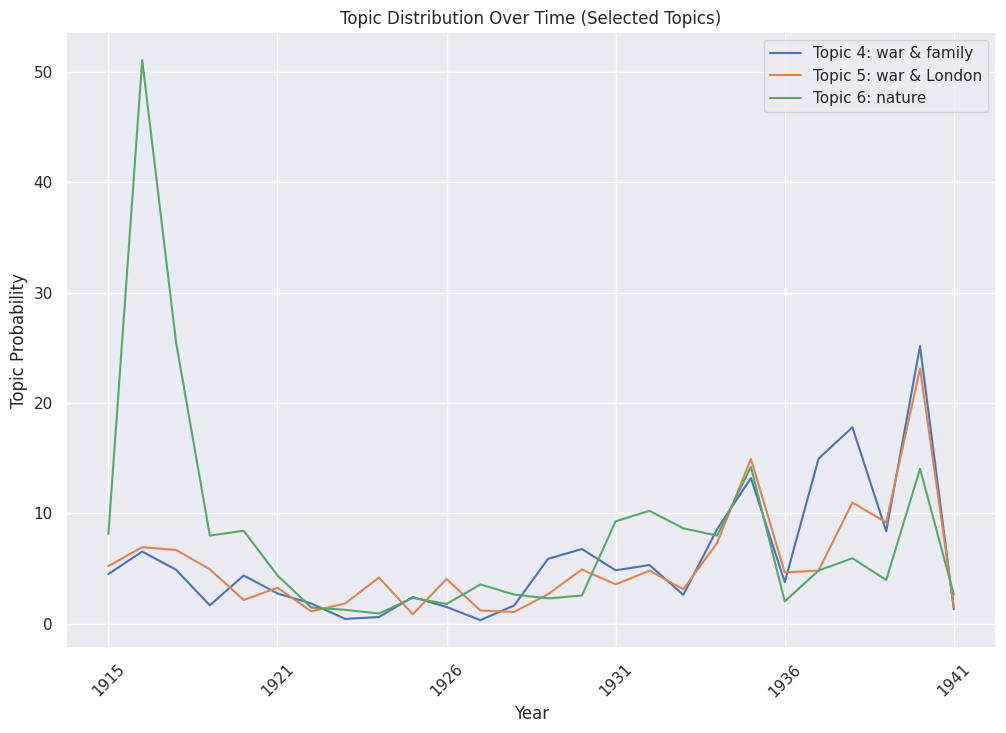

In [ ]:
#선택한 토픽만 그래프로 그리기
selected_topics = {
    4: 'war & family',
    5: 'war & London',
    6: 'nature',
}

plt.figure(figsize=(12, 8))
for topic_id, topic_name in selected_topics.items():
    if topic_id in topic_probs:
        plt.plot(years, topic_probs[topic_id], label=f'Topic {topic_id}: {topic_name}')
    else:
        print(f"Warning: Topic {topic_id} not found in topic_probs")

plt.xticks(ticks=range(0, len(years), 5), labels=[years[i] for i in range(0, len(years), 5)], rotation=45)
plt.xlabel('Year')
plt.ylabel('Topic Probability')
plt.title('Topic Distribution Over Time (Selected Topics)')
plt.legend()
plt.show()

In [ ]:
def make_topictable(lda_model, corpus):
    topic_table = pd.DataFrame()

    for i, topic_dist in enumerate(lda_model[corpus]):
        # ldamodel.per_word_topics가 True면 topic_list[0]을 fasle면 topic_list 전체를 할당
        doc = topic_dist[0] if lda_model.per_word_topics else topic_dist

        # 각 문서에 대해 가장 비중이 높은 토픽 찾기
        if doc:
            top_topic, weight = max(doc, key=lambda x: x[1])
            new_row = pd.DataFrame([pd.Series([int(top_topic), round(weight, 4), topic_dist])])
            topic_table = pd.concat([topic_table, new_row], ignore_index=True)

    return topic_table

In [ ]:
topictable = make_topictable(lda_model, corpus)
topictable = topictable.reset_index() # 문서 번호를 의미하는 열로 사용하기 위해 인덱스를 추가
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:1614]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,7,0.5523,"[(7, 0.5523453), (9, 0.41801468)]"
1,1,6,0.9816,"[(6, 0.98162574)]"
2,2,5,0.4338,"[(1, 0.31530762), (5, 0.433774), (7, 0.23662788)]"
3,3,6,0.6962,"[(3, 0.288135), (6, 0.6961728)]"
4,4,6,0.4319,"[(3, 0.37939408), (6, 0.43187094), (9, 0.17761..."
...,...,...,...,...
1609,1609,5,0.8894,"[(1, 0.08896468), (5, 0.8894068)]"
1610,1610,6,0.6413,"[(1, 0.33583075), (6, 0.64130276)]"
1611,1611,9,0.6983,"[(5, 0.28956077), (9, 0.6983135)]"
1612,1612,3,0.3258,"[(0, 0.14082788), (3, 0.32577708), (6, 0.20560..."
